# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')

sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [3]:
sinasc_raw['faixa_latitude'] = sinasc_raw['munResLat'].apply(lambda x: 'Acima de -10.5' if x > -10.5 else 'Abaixo de -10.5')


result = sinasc_raw.groupby('faixa_latitude')['IDADEMAE'].aggregate(
    ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
)

result

,sum,mean,min,max,median,std,var
faixa_latitude,,,,,,,
Abaixo de -10.5,340167,26.178775,12,53,26.0,6.320171,39.944563
Acima de -10.5,365094,26.014964,11,52,25.0,6.447663,41.572355


In [4]:
result2 = sinasc_raw.groupby('faixa_latitude')['IDADEPAI'].aggregate(
    ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
)

result2

,sum,mean,min,max,median,std,var
faixa_latitude,,,,,,,
Abaixo de -10.5,198482.0,30.901759,15.0,86.0,30.0,7.707202,59.400967
Acima de -10.5,38038.0,32.126689,16.0,73.0,31.0,8.034214,64.548602


### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [5]:
sinasc_raw['faixa_area'] = sinasc_raw['munResArea'].apply(lambda x: 'Acima de 3000' if x > 3000 else 'Abaixo de 3000')

result3 = sinasc_raw.groupby('faixa_area')['QTDFILVIVO'].aggregate(
    ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
)

result3

,sum,mean,min,max,median,std,var
faixa_area,,,,,,,
Abaixo de 3000,4774.0,0.924298,0.0,30.0,1.0,1.075338,1.156352
Acima de 3000,22053.0,1.086890,0.0,14.0,1.0,1.191750,1.420268


In [6]:
sinasc_raw['faixa_area'] = sinasc_raw['munResArea'].apply(lambda x: 'Acima de 3000' if x > 3000 else 'Abaixo de 3000')

result4 = sinasc_raw.groupby('faixa_area')['QTDFILMORT'].aggregate(
    ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
)

result4

,sum,mean,min,max,median,std,var
faixa_area,,,,,,,
Abaixo de 3000,1261.0,0.244949,0.0,4.0,0.0,0.551262,0.303889
Acima de 3000,5383.0,0.272116,0.0,28.0,0.0,0.629081,0.395743


### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [7]:
bins = [-float('inf'), 100, 300, float('inf')]
labels = ['A - Abaixo de 100', 'B - Entre 100 e 300', 'C - Acima de 300']

sinasc_raw['faixa_altitude'] = pd.cut(sinasc_raw['munResAlt'], bins=bins, labels=labels)

result5 = sinasc_raw.groupby('faixa_altitude')['ESTCIVMAE'].aggregate(
    ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
)

result5

,sum,mean,min,max,median,std,var
faixa_altitude,,,,,,,
A - Abaixo de 100,22243.0,2.541767,1.0,9.0,2.0,1.744034,3.041655
B - Entre 100 e 300,41112.0,2.654956,1.0,9.0,2.0,1.661356,2.760103
C - Acima de 300,4628.0,1.870655,1.0,9.0,2.0,1.261039,1.590218


### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [8]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

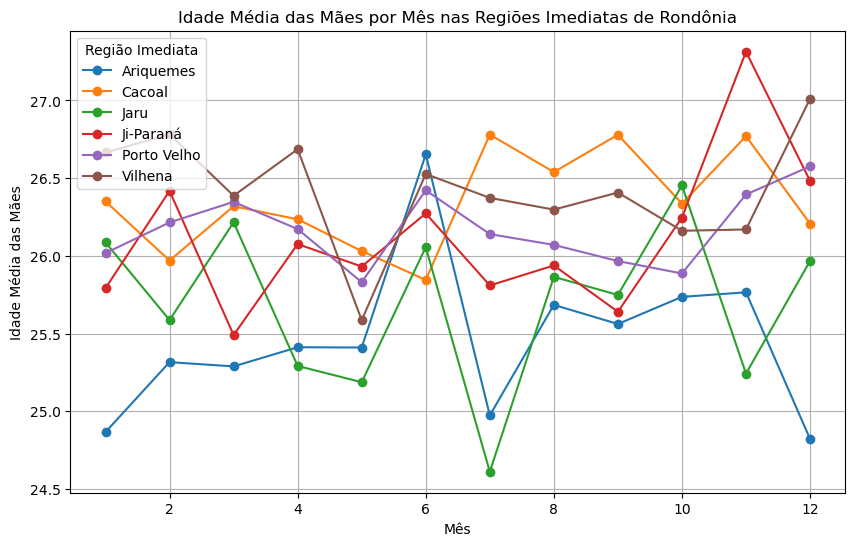

In [9]:
sinasc_raw['grupo'] = sinasc_raw['munResNome'].map(imediatas)

sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])

sinasc_raw['MESNASC'] = sinasc_raw['DTNASC'].dt.month

sinasc_2 = sinasc_raw[['grupo', 'IDADEMAE', 'MESNASC']]

resultado = sinasc_2.groupby(['grupo', 'MESNASC']).mean().reset_index()

plt.figure(figsize=(10, 6))

for grupo in resultado['grupo'].unique():
    grupo_data = resultado[resultado['grupo'] == grupo]
    plt.plot(grupo_data['MESNASC'], grupo_data['IDADEMAE'], marker='o', label=grupo)

plt.title('Idade Média das Mães por Mês nas Regiões Imediatas de Rondônia')
plt.xlabel('Mês')
plt.ylabel('Idade Média das Mães')
plt.legend(title='Região Imediata')
plt.grid(True)

plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [10]:
url_idh_RO = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M"
idh_RO = pd.read_html(url_idh_RO)

idh_df = idh_RO[0]

idh_df.columns = idh_df.columns.droplevel(2)
idh_df.columns = idh_df.columns.droplevel(0)

idh_df = idh_df.iloc[:,1:]
idh_df = idh_df.iloc[1:,:]
idh_df = idh_df.iloc[:-2, :]

idh_df.set_index(idh_df.columns[0], inplace=True)

idh_df = idh_df.iloc[:, 0:1]

idh_df.drop(index=['IDH-M alto', 'IDH-M médio', 'IDH-M baixo'], inplace=True)

idh_df['IDH municipal'] = pd.to_numeric(idh_df['IDH municipal'], errors='coerce')

idh_df['nivel_idh'] = pd.cut(idh_df['IDH municipal'],
                          bins=[0.0, 0.600, 0.700, np.inf],
                          labels = ["baixo", "médio", "alto"])

sinasc_5 = sinasc_raw[['IDADEMAE', 'IDADEPAI', 'QTDFILVIVO', 'ESCMAE', 'munResNome']]
sinasc_5 = sinasc_5.set_index('munResNome')

sinasc_5.groupby([idh_df['nivel_idh'], 'ESCMAE'])[['IDADEMAE',
                                                  'IDADEPAI',
                                                  'QTDFILVIVO']].agg(['mean', 'max', 'count', 'median'])




IDADEMAE                    IDADEPAI              \
                                mean max count median       mean   max count   
nivel_idh ESCMAE                                                               
baixo     1 a 3 anos       28.666667  44    27   26.0  28.250000  38.0     4   
          12 anos ou mais  28.370370  42   135   28.0  30.000000  44.0    45   
          4 a 7 anos       25.192857  42   280   25.0  30.536232  47.0    69   
          8 a 11 anos      24.708525  46   868   24.0  30.451613  58.0   217   
          Nenhuma          30.333333  41     3   27.0  29.000000  29.0     1   
médio     1 a 3 anos       28.980645  44   155   29.0  36.333333  60.0    24   
          12 anos ou mais  29.176389  44  1440   29.0  33.213687  62.0   716   
          4 a 7 anos       25.405036  47  1390   25.0  31.978916  73.0   332   
          8 a 11 anos      24.984915  53  4773   24.0  29.920570  69.0  1473   
          Nenhuma          32.909091  52    11   34.0  30.000000  30.0     1   
alto      1 a 3 anos       28.078571  45   280   28.0  33.300000  44.0    20   
          12 anos ou mais  29.794958  47  3848   30.0  33.131988  65.0  1288   
          4 a 7 anos       24.034766  46  2675   23.0  30.309456  63.0   349   
          8 a 11 anos      25.286052  47  8890   25.0  30.119860  70.0  1994   
          Nenhuma          30.739130  42    23   32.0  45.500000  52.0     2   

                                 QTDFILVIVO                     
                          median       mean   max count median  
nivel_idh ESCMAE                                                
baixo     1 a 3 anos        26.0   2.307692   5.0    26    2.0  
          12 anos ou mais   28.0   0.828125   3.0   128    1.0  
          4 a 7 anos        31.0   1.488550   8.0   262    1.0  
          8 a 11 anos       30.0   0.909091   7.0   814    1.0  
          Nenhuma           29.0   1.333333   4.0     3    0.0  
médio     1 a 3 anos        36.0   2.328947   8.0   152    2.0  
          12 anos ou mais   33.0   0.727925   4.0  1393    1.0  
          4 a 7 anos        31.0   1.616990  10.0  1342    1.0  
          8 a 11 anos       29.0   0.951535  14.0  4560    1.0  
          Nenhuma           30.0   3.000000   6.0    11    3.0  
alto      1 a 3 anos        34.0   2.481061  12.0   264    2.0  
          12 anos ou mais   32.0   0.719025   7.0  3527    1.0  
          4 a 7 anos        29.0   1.518236   9.0  2495    1.0  
          8 a 11 anos       29.0   0.982380  10.0  8286    1.0  
          Nenhuma           45.5   3.956522  12.0    23    3.0

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [23]:
url_ifdm_RO = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM"
ifdm_RO = pd.read_html(url_ifdm_RO)

ifdm_RO = ifdm_RO[0]

ifdm_RO.columns = ifdm_RO.columns.droplevel(1)

ifdm_RO = ifdm_RO.iloc[:, 1:]

ifdm_RO = ifdm_RO.iloc[1:-2, :]

ifdm_RO.set_index(ifdm_RO.columns[0], inplace=True)

ifdm_RO.drop(index=['Desenvolvimento moderado', 'Desenvolvimento regular'], inplace=True)

ifdm_RO.rename(columns={'IFDM Consolidado (2013)': 'IFDM_Consolidado_2013'}, inplace=True)

ifdm_RO['IFDM_Consolidado_2013'] = pd.to_numeric(ifdm_RO['IFDM_Consolidado_2013'])

ifdm_RO['nivel_ifdm'] = pd.cut(ifdm_RO['IFDM_Consolidado_2013'],
                          bins=[0.4, 0.6, np.inf],
                          labels = ["regular", "moderado"])

sinasc_5.groupby([ifdm_RO['nivel_ifdm'], 'ESCMAE'])[['IDADEMAE',
                                                  'IDADEPAI',
                                                  'QTDFILVIVO']].agg(['mean', 'max', 'count', 'median'])

IDADEMAE                     IDADEPAI        \
                                 mean max  count median       mean   max   
nivel_ifdm ESCMAE                                                          
regular    1 a 3 anos       28.951220  44     82   28.0  35.916667  60.0   
           12 anos ou mais  28.716186  43    451   28.0  32.791367  52.0   
           4 a 7 anos       25.036802  42    788   25.0  32.388489  73.0   
           8 a 11 anos      24.717504  46   2308   24.0  30.523622  61.0   
           Nenhuma          35.000000  52      8   37.5  29.000000  29.0   
moderado   1 a 3 anos       28.300000  45    380   28.0  33.888889  55.0   
           12 anos ou mais  29.674980  47   4972   30.0  33.113613  65.0   
           4 a 7 anos       24.439415  47   3557   24.0  30.769231  67.0   
           8 a 11 anos      25.234803  53  12223   24.0  29.985516  70.0   
           Nenhuma          30.344828  42     29   31.0  40.333333  52.0   

                                        QTDFILVIVO                      
                           count median       mean   max  count median  
nivel_ifdm ESCMAE                                                       
regular    1 a 3 anos         12   33.0   2.493827   7.0     81    2.0  
           12 anos ou mais   139   32.0   0.759725   4.0    437    1.0  
           4 a 7 anos        139   32.0   1.695538  10.0    762    1.0  
           8 a 11 anos       508   30.0   1.014350  14.0   2230    1.0  
           Nenhuma             1   29.0   2.500000   6.0      8    2.5  
moderado   1 a 3 anos         36   35.0   2.401662  12.0    361    2.0  
           12 anos ou mais  1910   32.0   0.720885   7.0   4611    1.0  
           4 a 7 anos        611   30.0   1.515133  10.0   3337    1.0  
           8 a 11 anos      3176   29.0   0.958618  10.0  11430    1.0  
           Nenhuma             3   39.0   3.724138  12.0     29    3.0

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [55]:
url_PIB_RO = " https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB"
PIB_RO = pd.read_html(url_PIB_RO)

pib_RO_df = pd.DataFrame()

for i in range (0,6):
    pib = pd.DataFrame(PIB_RO[i])
    pib_RO_df = pd.concat([pib_RO_df, pib])
    
pib_RO_df.reset_index(inplace=True)

pib_RO_df = pib_RO_df.droplevel([0], axis=1)


pib_RO_df = pib_RO_df.iloc[:, 3:5]

pib_RO_df.set_index(pib_RO_df.columns[0], inplace=True)

pib_RO_df['PIB'] = pd.to_numeric(pib_RO_df['PIB'].str.replace(" ", ""))

pib_RO_df['nivel_PIB'] = pd.cut(pib_RO_df['PIB'],
                          bins=[50000,100000,500000,1000000, np.inf],
                          labels = ["Acima de 50 milhoes",
                                    "Acima de 100 milhoes",
                                    "Acima de 500 milhoes",
                                    "Acima de 1 Bilhao"])

sinasc_5.groupby([pib_RO_df['nivel_PIB'], 'ESCMAE'])[['IDADEMAE',
                                                  'IDADEPAI',
                                                  'QTDFILVIVO']].agg(['mean', 'max', 'count', 'median'])


IDADEMAE                    IDADEPAI  \
                                           mean max count median       mean   
nivel_PIB            ESCMAE                                                   
Acima de 50 milhoes  1 a 3 anos       29.714286  39     7   29.0  33.000000   
                     12 anos ou mais  30.207547  41    53   30.0  32.333333   
                     4 a 7 anos       25.222222  40    72   25.0  33.058824   
                     8 a 11 anos      25.971074  40   242   26.0  31.089041   
                     Nenhuma          35.000000  35     1   35.0        NaN   
Acima de 100 milhoes 1 a 3 anos       29.413043  44    92   28.5  38.866667   
                     12 anos ou mais  28.700368  43   544   28.5  33.046083   
                     4 a 7 anos       25.264305  47   734   25.0  32.039216   
                     8 a 11 anos      24.715127  46  2208   24.0  30.131988   
                     Nenhuma          39.000000  52     4   38.0  30.000000   
Acima de 500 milhoes 1 a 3 anos       28.535714  42    56   28.0  28.166667   
                     12 anos ou mais  29.353160  44   538   29.0  33.790576   
                     4 a 7 anos       25.466346  42   624   25.0  32.118280   
                     8 a 11 anos      24.888520  53  2108   24.0  30.075269   
                     Nenhuma          28.142857  42     7   24.0  29.000000   
Acima de 1 Bilhao    1 a 3 anos       28.065147  45   307   28.0  33.320000   
                     12 anos ou mais  29.731576  47  4288   30.0  33.033084   
                     4 a 7 anos       24.154031  46  2915   23.0  30.402128   
                     8 a 11 anos      25.285471  47  9973   24.0  29.979381   
                     Nenhuma          30.880000  42    25   32.0  45.500000   

                                                        QTDFILVIVO        \
                                       max count median       mean   max   
nivel_PIB            ESCMAE                                                
Acima de 50 milhoes  1 a 3 anos       38.0     2   33.0   2.000000   6.0   
                     12 anos ou mais  46.0    39   32.0   0.641509   2.0   
                     4 a 7 anos       67.0    34   32.0   1.408451   6.0   
                     8 a 11 anos      61.0   146   30.0   0.974790   5.0   
                     Nenhuma           NaN     0    NaN   2.000000   2.0   
Acima de 100 milhoes 1 a 3 anos       60.0    15   38.0   2.355556   8.0   
                     12 anos ou mais  52.0   217   33.0   0.772556   4.0   
                     4 a 7 anos       73.0   153   32.0   1.435393   9.0   
                     8 a 11 anos      64.0   644   29.0   0.874479  14.0   
                     Nenhuma          30.0     1   30.0   1.750000   5.0   
Acima de 500 milhoes 1 a 3 anos       37.0     6   28.0   2.648148   7.0   
                     12 anos ou mais  60.0   191   33.0   0.770000   4.0   
                     4 a 7 anos       60.0    93   32.0   1.910806  10.0   
                     8 a 11 anos      49.0   372   29.0   1.090384  11.0   
                     Nenhuma          29.0     1   29.0   3.142857   6.0   
Acima de 1 Bilhao    1 a 3 anos       44.0    25   35.0   2.405498  12.0   
                     12 anos ou mais  65.0  1602   32.0   0.713096   7.0   
                     4 a 7 anos       63.0   470   29.0   1.504574   9.0   
                     8 a 11 anos      70.0  2522   29.0   0.964103  10.0   
                     Nenhuma          52.0     2   45.5   3.880000  12.0   

                                                   
                                     count median  
nivel_PIB            ESCMAE                        
Acima de 50 milhoes  1 a 3 anos          7    1.0  
                     12 anos ou mais    53    1.0  
                     4 a 7 anos         71    1.0  
                     8 a 11 anos       238    1.0  
                     Nenhuma             1    2.0  
Acima de 100 milhoes 1 a 3 anos         90    2.0  
    

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

- Analisando cada um dos dados, foi verificado que, por fatores de saúde, economia e emprego, regiões mais desenvolvidas, por conta dos fatores citados, tendem a ter uma maior quantidade de pessoas (por serem regiões que atendem melhor às necessidades básicas em comparação com outras), o que resulta em uma quantidade maior de natalidade.